# Predicting Object Class (Galaxy, Star or Quasar) with Aritificial Neural Network and XGBoost

## Problem Statement

The class identifies an object to be either a galaxy, star or quasar. This will be the response variable which we will be trying to predict. The purpose of this study is based on the available data, it was estimated whether **class** are ***GALAXY***, ***STAR*** or ***QUASAR***.

## Dataset

Datasets are downloaded from [Kaggle user Lennart Grosser](https://www.kaggle.com/lucidlenn/sloan-digital-sky-survey). You can find the details of the datasets Kaggle. **Skyserver_SQL2_27_2018 6_51_39 PM.csv** dataset has ***18*** columns and ***10001*** rows with the header.

## Methodology

In this project, as stated in the title, results were obtained through **XGBoost** and **artificial neural networks (ANN)** methods. 

_________________________________________________________________

Created on Fri Oct 15 00:08:09 2021

@author: doguilmak

dataset: https://www.kaggle.com/lucidlenn/sloan-digital-sky-survey


## 1. Importing libraries 

In [1]:
from keras.models import load_model
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

Using TensorFlow backend.
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py

## 2. Data Preprocessing

### 2.1. Uploading data

In [2]:
df = pd.read_csv('Skyserver_SQL2_27_2018 6_51_39 PM.csv')
df.head(5)

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,1.237650e+18,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,301,4,267,3.722360e+18,STAR,-0.000009,3306,54922,491
1,1.237650e+18,183.598371,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,301,4,267,3.638140e+17,STAR,-0.000055,323,51615,541
2,1.237650e+18,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,301,4,268,3.232740e+17,GALAXY,0.123111,287,52023,513
3,1.237650e+18,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,301,4,269,3.722370e+18,STAR,-0.000111,3306,54922,510
4,1.237650e+18,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,301,4,269,3.722370e+18,STAR,0.000590,3306,54922,512


### 2.2. Removing unnecessary columns

In [3]:
df.drop(['objid','fiberid'], axis = 1, inplace = True)

In [4]:
df.head(5)

,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd
0,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,301,4,267,3.722360e+18,STAR,-0.000009,3306,54922
1,183.598371,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,301,4,267,3.638140e+17,STAR,-0.000055,323,51615
2,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,301,4,268,3.232740e+17,GALAXY,0.123111,287,52023
3,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,301,4,269,3.722370e+18,STAR,-0.000111,3306,54922
4,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,301,4,269,3.722370e+18,STAR,0.000590,3306,54922


### 2.3. Looking for NaN values

In [5]:
df.isnull().sum().sum()

0

### 2.4. Looking for duplicated rows

In [6]:
df.duplicated().sum()

0

### 2.5. Looking for anomalies

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ra,10000.0,1.755300e+02,4.778344e+01,8.235100e+00,1.573709e+02,1.803945e+02,2.015473e+02,2.608844e+02
dec,10000.0,1.483615e+01,2.521221e+01,-5.382632e+00,-5.390350e-01,4.041660e-01,3.564940e+01,6.854227e+01
u,10000.0,1.861936e+01,8.286560e-01,1.298897e+01,1.817804e+01,1.885309e+01,1.925923e+01,1.959990e+01
g,10000.0,1.737193e+01,9.454572e-01,1.279955e+01,1.681510e+01,1.749513e+01,1.801015e+01,1.991897e+01
r,10000.0,1.684096e+01,1.067764e+00,1.243160e+01,1.617333e+01,1.685877e+01,1.751268e+01,2.480204e+01
i,10000.0,1.658358e+01,1.141805e+00,1.194721e+01,1.585370e+01,1.655499e+01,1.725855e+01,2.817963e+01
z,10000.0,1.642283e+01,1.203188e+00,1.161041e+01,1.561829e+01,1.638995e+01,1.714145e+01,2.283306e+01
run,10000.0,9.810348e+02,2.733050e+02,3.080000e+02,7.520000e+02,7.560000e+02,1.331000e+03,1.412000e+03
rerun,10000.0,3.010000e+02,0.000000e+00,3.010000e+02,3.010000e+02,3.010000e+02,3.010000e+02,3.010000e+02
camcol,10000.0,3.648700e+00,1.666183e+00,1.000000e+00,2.000000e+00,4.000000e+00,5.000000e+00,6.000000e+00


### 2.6. Label encoding

In [8]:
from sklearn.preprocessing import LabelEncoder
df = df.apply(LabelEncoder().fit_transform)
df

,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd
0,5378,4030,8818,3143,1853,1594,1474,3,0,3,256,5641,2,1681,267,182
1,5392,4145,4066,3722,4220,4703,4956,3,0,3,256,2267,2,1437,49,6
2,5405,4118,8203,8155,7210,6793,6350,3,0,3,257,1289,0,8222,21,80
3,5458,3910,1569,1960,2431,2897,3415,3,0,3,258,5642,2,1162,267,182
4,5462,4064,1206,1255,3347,4943,5701,3,0,3,258,5642,2,3501,267,182
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1300,8185,4765,4816,5129,5367,5339,16,0,2,150,3999,0,4124,111,37
9996,1299,8198,2765,4665,5707,5488,6007,16,0,2,151,3997,0,8089,111,37
9997,1316,8196,4467,6285,7400,7927,8097,16,0,2,151,6240,2,379,459,341
9998,1311,8204,5071,6921,7442,7735,7408,16,0,2,152,3997,0,3881,111,37


### 2.7. Determination of dependent and independent variable

In [9]:
y = df["class"]
X = df.drop("class", axis = 1)

In [10]:
X

,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,redshift,plate,mjd
0,5378,4030,8818,3143,1853,1594,1474,3,0,3,256,5641,1681,267,182
1,5392,4145,4066,3722,4220,4703,4956,3,0,3,256,2267,1437,49,6
2,5405,4118,8203,8155,7210,6793,6350,3,0,3,257,1289,8222,21,80
3,5458,3910,1569,1960,2431,2897,3415,3,0,3,258,5642,1162,267,182
4,5462,4064,1206,1255,3347,4943,5701,3,0,3,258,5642,3501,267,182
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1300,8185,4765,4816,5129,5367,5339,16,0,2,150,3999,4124,111,37
9996,1299,8198,2765,4665,5707,5488,6007,16,0,2,151,3997,8089,111,37
9997,1316,8196,4467,6285,7400,7927,8097,16,0,2,151,6240,379,459,341
9998,1311,8204,5071,6921,7442,7735,7408,16,0,2,152,3997,3881,111,37


In [11]:
y

0       2
1       2
2       0
3       2
4       2
       ..
9995    0
9996    0
9997    2
9998    0
9999    0
Name: class, Length: 10000, dtype: int32

### 2.8.  Splitting test and train 

In [12]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

### 2.9.  Scaling datas

In [13]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

X_train = sc.fit_transform(x_train)
X_test = sc.transform(x_test)

## 3. Artificial Neural Network 

### 3.1 Loading Created Model

In [14]:
classifier = load_model('model.h5')

In [15]:
classifier

### 3.2. Checking the Architecture of the Model

In [16]:
classifier.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 32)                512       
_________________________________________________________________
dense_6 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_7 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_8 (Dense)              (None, 3)                 99        
Total params: 1,683
Trainable params: 1,683
Non-trainable params: 0
_________________________________________________________________


### 3.3 Importing libraries

In [17]:
from keras.models import Sequential
from keras.layers import Dense

### 3.4. Creating layers

Other activation functions:

Activations link: https://keras.io/api/layers/activations/
 - activation="sigmoid"
 - activation="relu"
 - activation="softmax"
 - activation="softplus"


In [18]:
classifier = Sequential()
# Creating first hidden layer:
classifier.add(Dense(32, init="uniform", activation="relu", input_dim=15))
# Creating second hidden layer:
classifier.add(Dense(16, init="uniform", activation="relu"))
# Creating third hidden layer:
classifier.add(Dense(32, init="uniform", activation="relu"))
# Creating output layer:
classifier.add(Dense(3, init="uniform", activation="softmax"))

# Creating output layer:
classifier.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
classifier.summary()
#classifier.save('model.h5')
classifier_history = classifier.fit(X, y, epochs=128, batch_size=32, validation_split=0.13)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 32)                512       
_________________________________________________________________
dense_2 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_3 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_4 (Dense)              (None, 3)                 99        
Total params: 1,683
Trainable params: 1,683
Non-trainable params: 0
_________________________________________________________________

Train on 8700 samples, validate on 1300 samples
Epoch 1/128
8700/8700 [==============================] - 0s 51us/step - loss: 0.2738 - accuracy: 0.8957 - val_loss: 0.1521 - val_accuracy: 0.9423
Epoch 2/128
8700/8700 [==============================] 

8700/8700 [==============================] - 0s 34us/step - loss: 0.0916 - accuracy: 0.9695 - val_loss: 0.0923 - val_accuracy: 0.9808
Epoch 50/128
8700/8700 [==============================] - 0s 34us/step - loss: 0.0878 - accuracy: 0.9710 - val_loss: 0.0790 - val_accuracy: 0.9708
Epoch 51/128
8700/8700 [==============================] - 0s 33us/step - loss: 0.0807 - accuracy: 0.9746 - val_loss: 0.0949 - val_accuracy: 0.9708
Epoch 52/128
8700/8700 [==============================] - 0s 32us/step - loss: 0.0904 - accuracy: 0.9698 - val_loss: 0.0803 - val_accuracy: 0.9777
Epoch 53/128
8700/8700 [==============================] - 0s 33us/step - loss: 0.0849 - accuracy: 0.9724 - val_loss: 0.0966 - val_accuracy: 0.9708
Epoch 54/128
8700/8700 [==============================] - 0s 33us/step - loss: 0.0809 - accuracy: 0.9740 - val_loss: 0.2100 - val_accuracy: 0.9515
Epoch 55/128
8700/8700 [==============================] - 0s 33us/step - loss: 0.0862 - accuracy: 0.9733 - val_loss: 0.0881 - val_a

Epoch 105/128
8700/8700 [==============================] - 0s 31us/step - loss: 0.0646 - accuracy: 0.9803 - val_loss: 0.0729 - val_accuracy: 0.9838
Epoch 106/128
8700/8700 [==============================] - 0s 34us/step - loss: 0.0650 - accuracy: 0.9799 - val_loss: 0.0747 - val_accuracy: 0.9838
Epoch 107/128
8700/8700 [==============================] - 0s 33us/step - loss: 0.0679 - accuracy: 0.9793 - val_loss: 0.0891 - val_accuracy: 0.9792
Epoch 108/128
8700/8700 [==============================] - 0s 35us/step - loss: 0.0883 - accuracy: 0.9748 - val_loss: 0.0814 - val_accuracy: 0.9754
Epoch 109/128
8700/8700 [==============================] - 0s 33us/step - loss: 0.0709 - accuracy: 0.9792 - val_loss: 0.0705 - val_accuracy: 0.9785
Epoch 110/128
8700/8700 [==============================] - 0s 32us/step - loss: 0.0734 - accuracy: 0.9784 - val_loss: 0.0667 - val_accuracy: 0.9800
Epoch 111/128
8700/8700 [==============================] - 0s 30us/step - loss: 0.0643 - accuracy: 0.9803 - val_

### 3.5. Plotting accuracy and val_accuracy

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


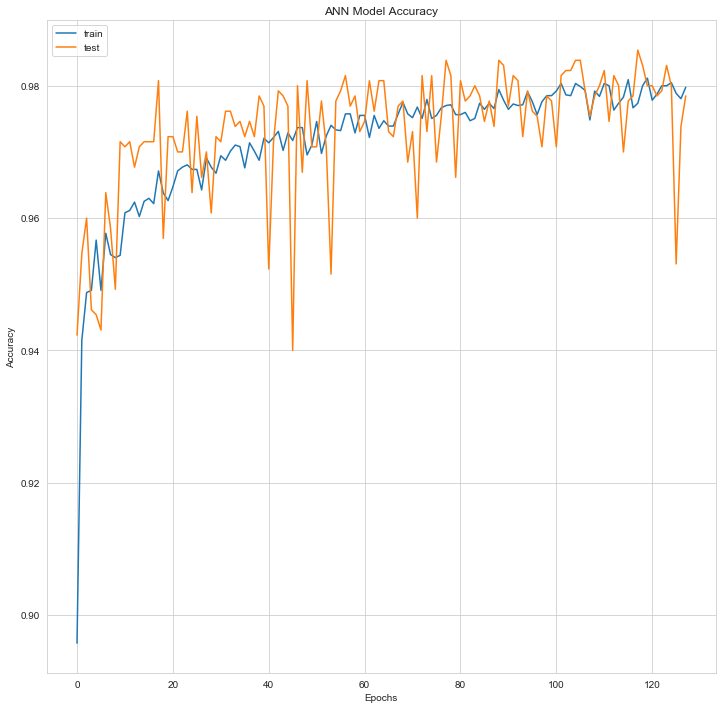

In [19]:
print(classifier_history.history.keys())

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 12))
sns.set_style('whitegrid')
plt.plot(classifier_history.history['accuracy'])
plt.plot(classifier_history.history['val_accuracy'])
plt.title('ANN Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### 3.5. Prediction

In [20]:
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

predict = X.iloc[0:1, ]
if classifier.predict_classes(predict) == 0:
    print('\nModel predicted as GALAXY.')
    print(f'Model predicted class as {classifier.predict_classes(predict)}.')
elif classifier.predict_classes(predict) == 1:
    print('\nModel predicted as QS0.')
    print(f'Model predicted class as {classifier.predict_classes(predict)}.')   
else:
    print('\nModel predicted as STAR')
    print(f'Model predicted class as {classifier.predict_classes(predict)}.')


Model predicted as STAR
Model predicted class as [2].


## 4. XGBoost 

### 4.1 Impotring XGBoost classifier

In [21]:
from xgboost import XGBClassifier
model=XGBClassifier()

### 4.2. Fit XGBoost

In [22]:
model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

### 4.3. Prediction

In [23]:
y_pred_XGBoost = model.predict(X_test)

print('\nXGBoost Prediction')
# 1st column = GALAXY accuracy
# 2nd column = QUASAR accuracy
# 3rd column = STAR accuracy
predict_model_XGBoost = X.iloc[0:1, ]
print(f'Model output: {classifier.predict(predict_model_XGBoost)}.')


XGBoost Prediction
Model output: [[2.124765e-05 9.260834e-14 9.999788e-01]].


### 4.4. XGBoost Accuracy Score

In [24]:
from sklearn.metrics import accuracy_score
print(f"\nAccuracy score(XGBoost): {accuracy_score(y_test, y_pred_XGBoost)}")


Accuracy score(XGBoost): 0.9939393939393939
